Import statements

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
import time

Read in data from CSV

In [189]:
df = pd.read_csv("cleaned_data_discreet.csv")
df.drop(["Unnamed: 0"], axis = 1,inplace = True)
columns = df.columns
df.head()


,Number of Bachelor's Degrees,Percent Financial Aid,Average Amount of Aid,Retention Rate,Enrollment,Percent Women,Percent In State,Percent Out of State,Percent Foreign,Percent Unknown,Graduation Rate,Percent Awarded,Total Staff,Instructional Staff,SA Staff,Librarian Staff,Percent Books,Percent Digital,Percent Admitted,Total Price
0,208.0,100.0,32400.0,79.0,996,99.0,59.0,36.0,4.0,0.0,69.0,66.0,357.0,105.0,56.0,62.0,41,12,70.0,"50,000-60,000"
1,310.0,100.0,40855.0,75.0,1533,54.0,66.0,32.0,1.0,0.0,64.0,61.0,435.0,132.0,21.0,27.0,37,54,68.0,"50,000-60,000"
2,398.0,100.0,39796.0,68.0,1912,60.0,53.0,46.0,1.0,0.0,51.0,48.0,355.0,123.0,17.0,21.0,28,13,62.0,"60,000-70,000"
3,382.0,100.0,38689.0,82.0,1771,56.0,50.0,45.0,4.0,0.0,74.0,70.0,426.0,160.0,41.0,50.0,27,46,64.0,"60,000-70,000"
4,61.0,97.0,10055.0,37.0,698,45.0,64.0,34.0,0.0,2.0,31.0,10.0,115.0,41.0,4.0,7.0,20,76,64.0,"20,000-30,000"


Set x to the seven most important features & set y to the target: Total Price. Split the data 70-30 & shuffle. 

In [190]:
x = df[["Average Amount of Aid", "Percent Financial Aid", "Percent Awarded", "Total Staff",
        "Graduation Rate", "Percent Admitted", "Number of Bachelor's Degrees"]]
y = df['Total Price']
#print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, shuffle = True)
print(y_train)

82     40,000-50,000
43     60,000-70,000
135    50,000-60,000
192    30,000-40,000
64     40,000-50,000
           ...      
42     50,000-60,000
191    20,000-30,000
224    40,000-50,000
130    50,000-60,000
157    50,000-60,000
Name: Total Price, Length: 157, dtype: object


Test different scalers, fit the x_train, and use the optimal scaler to transform x_train and x_test. PowerTransformer works best here because it maintains the spacial relationships and maintains a normal distribution. 

In [191]:
# Standardize the features:
scaler = PowerTransformer()
#scaler = StandardScaler()
#scaler = MaxAbsScaler()
#scaler = RobustScaler()
scaler.fit(x_train)
X_train_std = scaler.transform(x_train)
X_test_std = scaler.transform(x_test)

#print(x_train, y_train)


Test and print test & train accuracies for a number of n_neighbors 1 through 10. Previously tested different distance and found that manhattan produces the best results because of the variability in the features. 

KNN Accuracy for 1 neighbors: 0.45588235294117646
cv_scores mean:0.5022222222222222
KNN Accuracy for 2 neighbors: 0.45588235294117646
cv_scores mean:0.48888888888888893
KNN Accuracy for 3 neighbors: 0.45588235294117646
cv_scores mean:0.49333333333333335
KNN Accuracy for 4 neighbors: 0.5147058823529411
cv_scores mean:0.5333333333333334
KNN Accuracy for 5 neighbors: 0.5735294117647058
cv_scores mean:0.5599999999999999
KNN Accuracy for 6 neighbors: 0.5882352941176471


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 member

cv_scores mean:0.5377777777777777
KNN Accuracy for 7 neighbors: 0.5588235294117647
cv_scores mean:0.5066666666666666
KNN Accuracy for 8 neighbors: 0.5882352941176471
cv_scores mean:0.5244444444444445
KNN Accuracy for 9 neighbors: 0.5294117647058824
cv_scores mean:0.5199999999999999
KNN Accuracy for 10 neighbors: 0.6029411764705882
cv_scores mean:0.5422222222222223


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 member

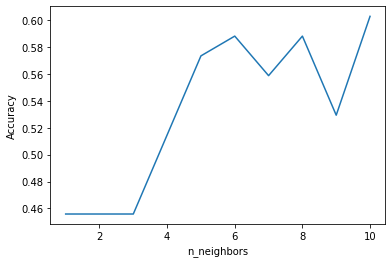

In [223]:
num_K = [i for i in range (1,11)]
acc = []

for k in num_K:
    model = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    #y_new = model.predict(X_train_std)
    acc.append(accuracy_score(y_test, y_pred))
    print("KNN Accuracy for " + str(k) + " neighbors: " + str(accuracy_score(y_test, y_pred)))
    cv_scores = cross_val_score(model, x, y, cv=5)
    print("cv_scores mean:{}".format(np.mean(cv_scores)))
    #print("KNN Accuracy for train " + str(k) + " neighbors: " + str(accuracy_score(y_train, y_new)))

plt.plot(num_K, acc)
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.show()
#plt.plot(num_K, prec, label = "Precision")

KNN with n_neighbors 10 produces the best test accuracy with a manhattan distance metric